In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

A=0, B=0: P=0
A=0, B=1: P=1
A=1, B=0: P=1
A=1, B=1: P=0


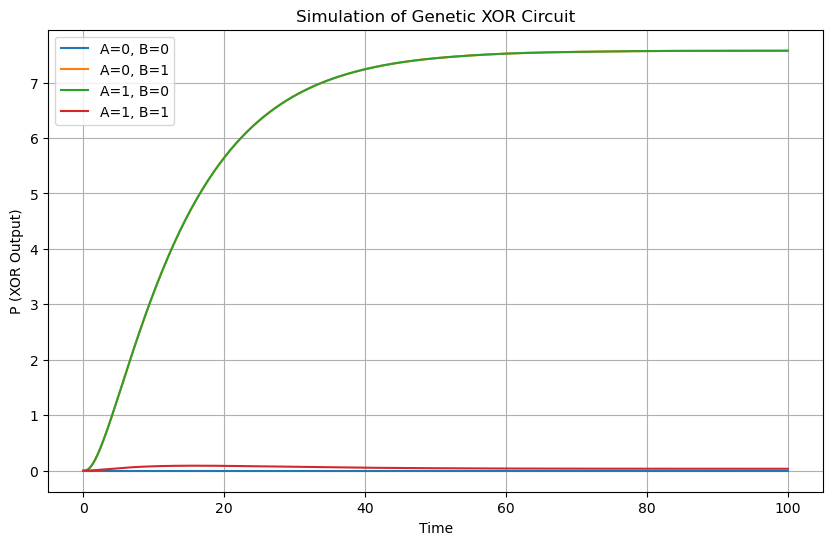

In [32]:
# Define the XOR model based on the given differential equations
def xor_genetic_circuit(t, variables, alpha, KA, KB, KAB, KX, KZ, KXZ, d, A, B):
    X, Y, Z, P = variables  # Unpacking the state variables

    # Define the equations based on the given model
    dX_dt = (alpha * (A/KA + B/KB + A*B/KAB)) / (1 + A/KA + B/KB + A*B/KAB) - d * X
    dY_dt = (alpha * (A*B/KAB)) / (1 + A/KA + B/KB + A*B/KAB) - d * Y
    dZ_dt = (alpha / (1 + Y/KM)) - d * Z
    dP_dt = (alpha * (X*Z/KXZ)) / (1 + X/KX + Z/KZ + X*Z/KXZ) - d * P

    return [dX_dt, dY_dt, dZ_dt, dP_dt]

# Define parameter values
alpha = 1.0   # Maximum expression level
KA = 1.0      # Threshold for A
KB = 1.0      # Threshold for B
KAB = 1.0     # Interaction threshold for AB

KX = 1.0      # Threshold for X
KZ = 1.0      # Threshold for Z
KXZ = 1.0     # Interaction threshold for XZ

KM=0.001

d = 0.1       # Degradation rate

# Define A, B values for XOR logic cases
cases = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Time range for simulation
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Store results for each case
xor_results = {}

# Solve the system of equations for each (A, B) case
for A, B in cases:
    initial_conditions = [0, 0, 0, 0]  # Reset initial conditions for each run
    sol = solve_ivp(xor_genetic_circuit, t_span, initial_conditions, args=(alpha, KA, KB, KAB, KX, KZ, KXZ, d, A, B), t_eval=t_eval)
    xor_results[(A, B)] = sol.y[-1]  # Store P(t) as the XOR output

# Plot results
plt.figure(figsize=(10, 6))
for (A, B), P_vals in xor_results.items():
    result=0
    if P_vals[-1] > 5:
        result=1
    print(f"A={A}, B={B}: P={result}")
    plt.plot(t_eval, P_vals, label=f"A={A}, B={B}")

plt.xlabel("Time")
plt.ylabel("P (XOR Output)")
plt.title("Simulation of Genetic XOR Circuit")
plt.legend()
plt.grid()
plt.show()